# Key determinants of happiness in England in 2023

The global interest on what determine happiness is constantly growing. Academics with different background start to consider this topic from different perspective in order to acquire dipper undertanding and more comprehensive view on what exactly make people happy. 
Such rising interest is not a surprise since evidence show that more happy population is able to positevly affect economy in a way of increased profuctivity, income and overall labor market performance. Understanding of key factors of happiness are not only interesting for us as individuals who want to undertand the nature of happiness and theirselves, but can also provide valuable insights for the government who is responsible for creating policies (Piekałkiewicz, 2017). Therefore, finding a policy that maximises the people level of happiness will lead to the creating better society and ecomomy. 

**Aim:**
This project aims to investigate socio-economic factors that significantly influence level of happiness across England in 2023.

**Key objectives:**
1. Conduct a literature review to identify existing academic frameworks and empirical evidence on the determinants of happiness.
2. Identify relevant UK data suitable to measure happiness and discover potential explanatory variables.
3. Perform exploratory data analysis to examine relationships and distribution of indentified variables, including happiness and ptential predictors.
4. Employ regression analysis to model the relationship between happiness and a range of socio-economic factors.

1. The undelined objectives will provide an opportunity to anwer the following questions that motivated the topic of this project:
2. What are the key factors that can be linked to variations in people level of happiness?
3. Which factors exhibit the strongest influence on happiness?

# The process of data mining

Prior to the data analysis and modelling, a robust data collection process is essential. To analyze happiness at a national level, it is necessary to use macro-level data. The Office for National Statistics (ONS) is a one of the most popular sources for such data, providing a range of relevant and reliable information.

This project is going to include the following variables (the detailed explanation of why they were chosen is given in the report). 

| Variable | Describtion | Link to the data |
|----------|--------------|-----------------|
| Life satisfaction | Average rating of life satisfaction (0 = 'not at all satisfied', 10 = 'completely satisfied') for people aged 16 and over for 2023 | https://explore-local-statistics.beta.ons.gov.uk/indicators/wellbeing-satisfaction |
| Gross median weekly pay | This indicator shows the average (median) weekly pay based on where people live in the UK for 2023 | https://explore-local-statistics.beta.ons.gov.uk/indicators/gross-median-weekly-pay |
| Level 3 or above qualifications | This indicator shows the percentage of the population aged 16 to 64 with Regulated Qualifications Framework (RQF) level 3+ qualificationsin 2023 | https://explore-local-statistics.beta.ons.gov.uk/indicators/level-3-or-above-qualifications | 
| Employment rate | The proportion of people aged between 16 and 64 years in paid work or who had a job that they were temporarily away from in 2023| https://explore-local-statistics.beta.ons.gov.uk/indicators/employment-rate | 
| Supermarkets| This indicator shows supermarkets per 10,000 people in the UK, as at August 2023 | https://explore-local-statistics.beta.ons.gov.uk/indicators/supermarkets | 
| Sports facilities | This indicator shows sports facilities per 10,000 people, in England, as at 5 October 2023| https://explore-local-statistics.beta.ons.gov.uk/indicators/sports-facilities | 

In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the downloaded data. Each variable is given in separate table

df_life_satisfaction = pd.read_csv('satisfaction.csv') 
df_wpay = pd.read_csv('gross-median-weekly-pay-table-data.csv')
df_emp_rate = pd.read_csv('employment-rate-table-data.csv')
df_qualification = pd.read_csv('level-3-or-above-qualifications-table-data.csv')
df_supermarkets = pd.read_csv('supermarkets-table-data.csv')
df_sports = pd.read_csv('sports-facilities-table-data.csv')

In [3]:
# Data preparation
# Filter columns with iformation for the yer of 2023 (where neccessary).
# Give the columns relevant names.

df_life_satisfaction_2023 = df_life_satisfaction[['Area code', 'Area name', '2022-23']] 
df_life_satisfaction_2023 = df_life_satisfaction_2023.rename(columns = {'2022-23': 'life_satisfaction'})

df_wpay_2023 = df_wpay[['Area code', 'Area name', '2023']] 
df_wpay_2023 = df_wpay_2023.rename(columns = {'2023': 'weekly_pay'})

df_emp_rate_2023 = df_emp_rate[['Area code', 'Area name', '2023']] 
df_emp_rate_2023 = df_emp_rate_2023.rename(columns = {'2023': 'emp_rate'})

df_qualification_2023 = df_qualification[['Area code', 'Area name', '2023']] 
df_qualification_2023 = df_qualification_2023.rename(columns = {'2023': 'qualification'})

df_supermarkets = df_supermarkets.rename(columns = {'2023': 'supermarkets'})
df_sports = df_sports.rename(columns = {'2023': 'sports'})

The imported datasets provide information on different variable. Each row represents the one lower-tier/unitary authority that has uniquie area code and area name.
The next important step is to gather information from all these datasets into one general dataset where rows will represent each observation (in our case each unitary authority) and columns will represent variables.

In [4]:
list_of_tables = [df_life_satisfaction_2023, df_wpay_2023, df_emp_rate_2023, df_qualification_2023, df_supermarkets, df_sports ]

n = 1
for i in list_of_tables:
    print(f'Table {n} has {len(i)} rows')
    n += 1

Table 1 has 374 rows
Table 2 has 361 rows
Table 3 has 363 rows
Table 4 has 363 rows
Table 5 has 378 rows
Table 6 has 313 rows


As it can be seen from the output of the above written code, the amount of rows differentiate. That is why the final dataset will contain smaller number of rows.

In [5]:
# Here is consistent merging of datasets is presented. 
# We use the merge method since it helps to include in the common table only information that is presented in both tables 
table1 =  pd.merge(df_life_satisfaction_2023, df_wpay_2023, on = ['Area code', 'Area name'])
table2 =  pd.merge(table1, df_emp_rate_2023, on = ['Area code', 'Area name'])
table3 =  pd.merge(table2, df_qualification_2023, on = ['Area code', 'Area name'])
table4 =  pd.merge(table3, df_supermarkets, on = ['Area code', 'Area name'])
table_final =  pd.merge(table4, df_sports, on = ['Area code', 'Area name'])


In [6]:
table_final

,Area code,Area name,life_satisfaction,weekly_pay,emp_rate,qualification,supermarkets,sports
0,E06000001,Hartlepool,7.29,521.2,67.9,57.9,3.47,17.44
1,E06000002,Middlesbrough,7.35,481.9,64.4,60.1,3.20,13.55
2,E06000003,Redcar and Cleveland,7.25,478.1,74.3,66.3,3.59,16.48
3,E06000004,Stockton-on-Tees,7.33,525.5,74.1,57.3,2.95,15.77
4,E06000005,Darlington,7.32,530.5,81.2,65.6,2.97,18.55
...,...,...,...,...,...,...,...,...
287,E09000029,Sutton,7.46,629.9,81.3,79.1,2.15,12.93
288,E09000030,Tower Hamlets,7.32,763.6,66.2,70.7,2.22,6.38
289,E09000031,Waltham Forest,7.16,678.1,73.7,75.1,1.69,9.45
290,E09000032,Wandsworth,7.45,846.8,83.9,85.9,2.53,11.21


As shown in the 'table final', it contains 292 rows, that is significantly fewer than the smallest separate dataset that has 313 values. This reduction occurs as a result of the merge operation which integrates data based on unique pairs of 'Area Code' and 'Area Name'. Consequently, data pairs that exist in one dataset but not others are excluded from the final table, leading to a smaller dataset. 

## Data cleaning process

After the data mining process, it is crucial to examine the data types of variables and identify missing values. Inconsitency in data types and null values can significantly decrease the quality of subsequent data analysis and modeling.

In [7]:
table_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area code          292 non-null    object 
 1   Area name          292 non-null    object 
 2   life_satisfaction  283 non-null    float64
 3   weekly_pay         290 non-null    float64
 4   emp_rate           290 non-null    float64
 5   qualification      290 non-null    float64
 6   supermarkets       292 non-null    float64
 7   sports             292 non-null    float64
dtypes: float64(6), object(2)
memory usage: 20.5+ KB


In [8]:
table_final.isnull().sum().sort_values()

Area code            0
Area name            0
supermarkets         0
sports               0
weekly_pay           2
emp_rate             2
qualification        2
life_satisfaction    9
dtype: int64

From the output above it can be revealed that certain unitary authorities lack information on "life satisfaction," "qualification," "emp_rate," and "weekly_pay." Thus, this is the problem of missing values that can be handled in two ways -  value drop and imputation (Brownlee, 2021).
The dropna() method removes entire rows containing missing values.  While convenient, this approach can be harmful when dealing with a large volume of missing data, potentially leading to a significant reduction in observations.
Fortunately, the missing values in our dataset represent less than 5% of the total data and appear to be randomly distributed, not following any systematic pattern (IBM Knowledge Center, n.d.). Given these characteristics, the deletion method is a suitable option for this specific case.

In [9]:
table_final = table_final.dropna()

In [10]:
table_final.columns

Index(['Area code', 'Area name', 'life_satisfaction', 'weekly_pay', 'emp_rate',
       'qualification', 'supermarkets', 'sports'],
      dtype='object')

## EDA

The following part is devoted to the exploratory data analysis which is essential step in any data-driven analysis. It can provide invaluable insights into characteristics of the data, help to undertand how variables are distributed and identify the potential relationships between variables. This can facilitate to make informed decisions about the appropriate modeling techniques, predict the output of the model and interpret the results more effectively. 

First of all, it will be useful to get some insights from our data. For instance, let's consider unitary authorities with highest and lowest level of life satisfaction. 

In [40]:
# finding the maximum, average and minimum levels of life satisfaction
max_life_satisfaction = table_final['life_satisfaction'].max()
average_life_satisfaction = table_final['life_satisfaction'].mean()
min_life_satisfaction = table_final['life_satisfaction'].min()
print(max_life_satisfaction, avarage_life_satisfaction, min_life_satisfaction)

8.21 7.471837455830385 6.46


In [35]:
# finding the areas with the maximum and minimum life satisfaction
max_life_satisfaction_area = table_final[table_final['life_satisfaction'] == max_life_satisfaction]['Area name'].tolist()[0]
min_life_satisfaction_area = table_final[table_final['life_satisfaction'] == min_life_satisfaction]['Area name'].tolist()[0]

In [38]:
areas = [max_life_satisfaction_area, min_life_satisfaction_area]

['Woking', 'Cambridge']


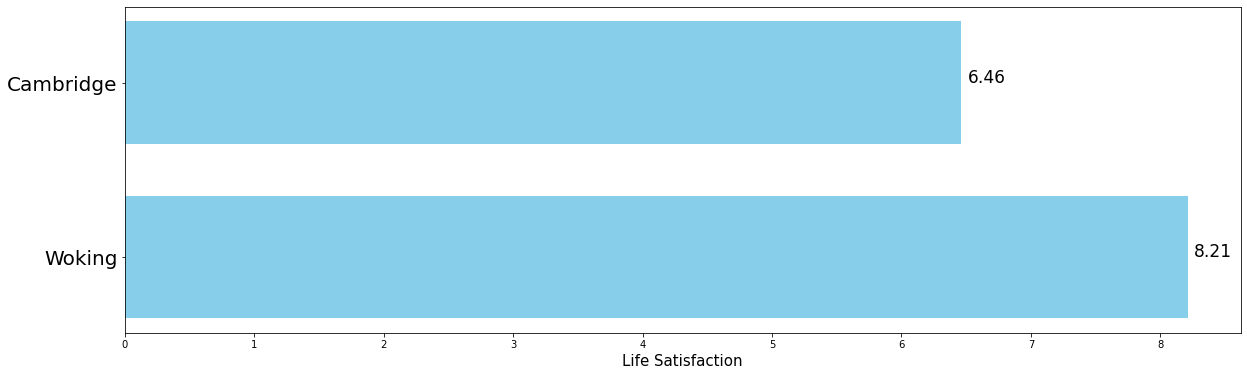

In [61]:
plt.figure(figsize = (20,6))

areas = [max_life_satisfaction_area, min_life_satisfaction_area]
life_satisfaction = [max_life_satisfaction, min_life_satisfaction]

# Create a horizontal bar chart
plt.barh(areas, life_satisfaction, color='skyblue', height=0.7)
plt.xlabel('Life Satisfaction', fontsize = 15)
#plt.title('Life Satisfaction Comparison', fontsize = 20)

for i, v in enumerate(life_satisfaction):
    plt.text(v +0.05 , i, str(v), color='black', fontsize = 17)

plt.yticks(fontsize=20)

# Show the plot
plt.savefig('life satisfaction.png')
plt.show()


As it can be seen from the graph above Cambrige authority has the smallest number of life satisfaction, while Woking the highest.

846.8 587.3643109540635 459.0


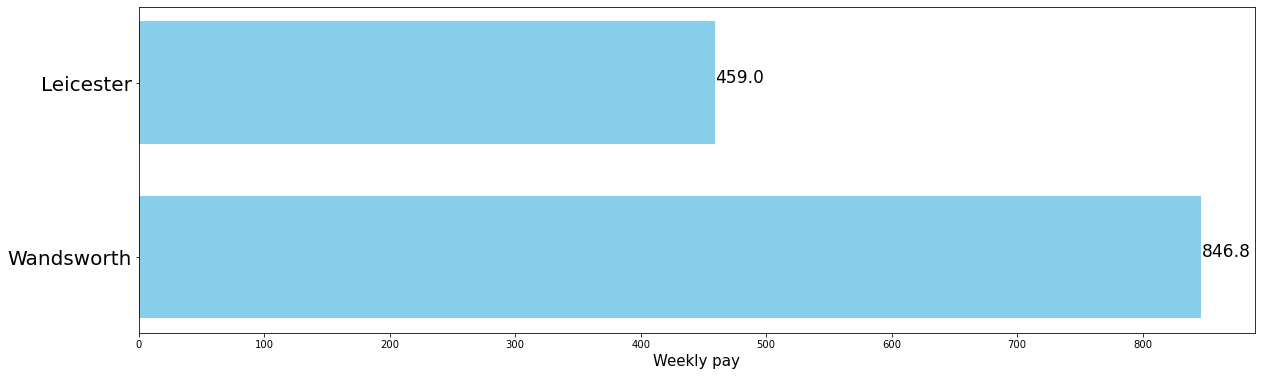

In [64]:
max_weekly_pay = table_final['weekly_pay'].max()
average_weekly_pay = table_final['weekly_pay'].mean()
min_weekly_pay = table_final['weekly_pay'].min()
print(max_weekly_pay, average_weekly_pay, min_weekly_pay)

max_weekly_pay_area = table_final[table_final['weekly_pay'] == max_weekly_pay]['Area name'].tolist()[0]
min_weekly_pay_area = table_final[table_final['weekly_pay'] == min_weekly_pay]['Area name'].tolist()[0]

plt.figure(figsize = (20,6))

areas = [max_weekly_pay_area, min_weekly_pay_area]
life_satisfaction = [max_weekly_pay, min_weekly_pay]

# Create a horizontal bar chart
plt.barh(areas, life_satisfaction, color='skyblue', height=0.7)
plt.xlabel('Weekly pay', fontsize = 15)
#plt.title('Life Satisfaction Comparison', fontsize = 20)

for i, v in enumerate(life_satisfaction):
    plt.text(v +0.07 , i, str(v), color='black', fontsize = 17)

plt.yticks(fontsize=20)

# Show the plot
plt.savefig('weekly pay.png')
plt.show()

## Distribution
Now let's procced with distribution analysis of variables. This will help to identify the outliers in the data that can affect the sbsequent modelling output and determine if the transformations (log, square root) are necessary in order to normalise the highly skewed distributions.

In [11]:
numeric_table = table_final[['life_satisfaction', 'weekly_pay', 'emp_rate','qualification', 'supermarkets', 'sports']]
numeric_table.describe()

,life_satisfaction,weekly_pay,emp_rate,qualification,supermarkets,sports
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,7.471837,587.364311,76.760777,66.957951,2.636396,18.129470
std,0.263039,70.015119,6.031023,9.389486,0.541837,5.237604
min,6.460000,459.000000,53.000000,41.300000,1.310000,5.710000
25%,7.320000,534.450000,73.100000,60.550000,2.265000,14.305000
50%,7.460000,574.800000,77.500000,66.700000,2.600000,17.650000
75%,7.615000,624.950000,81.150000,73.800000,2.945000,21.475000
max,8.210000,846.800000,90.400000,89.100000,4.710000,33.130000


Based on the summary statistics provided in the table, it can be concluded that the distributions of our variables is relatively symmetric as the mean and median are proximate to each other. 
Let us have closer look at this with the help of visual analysis. 

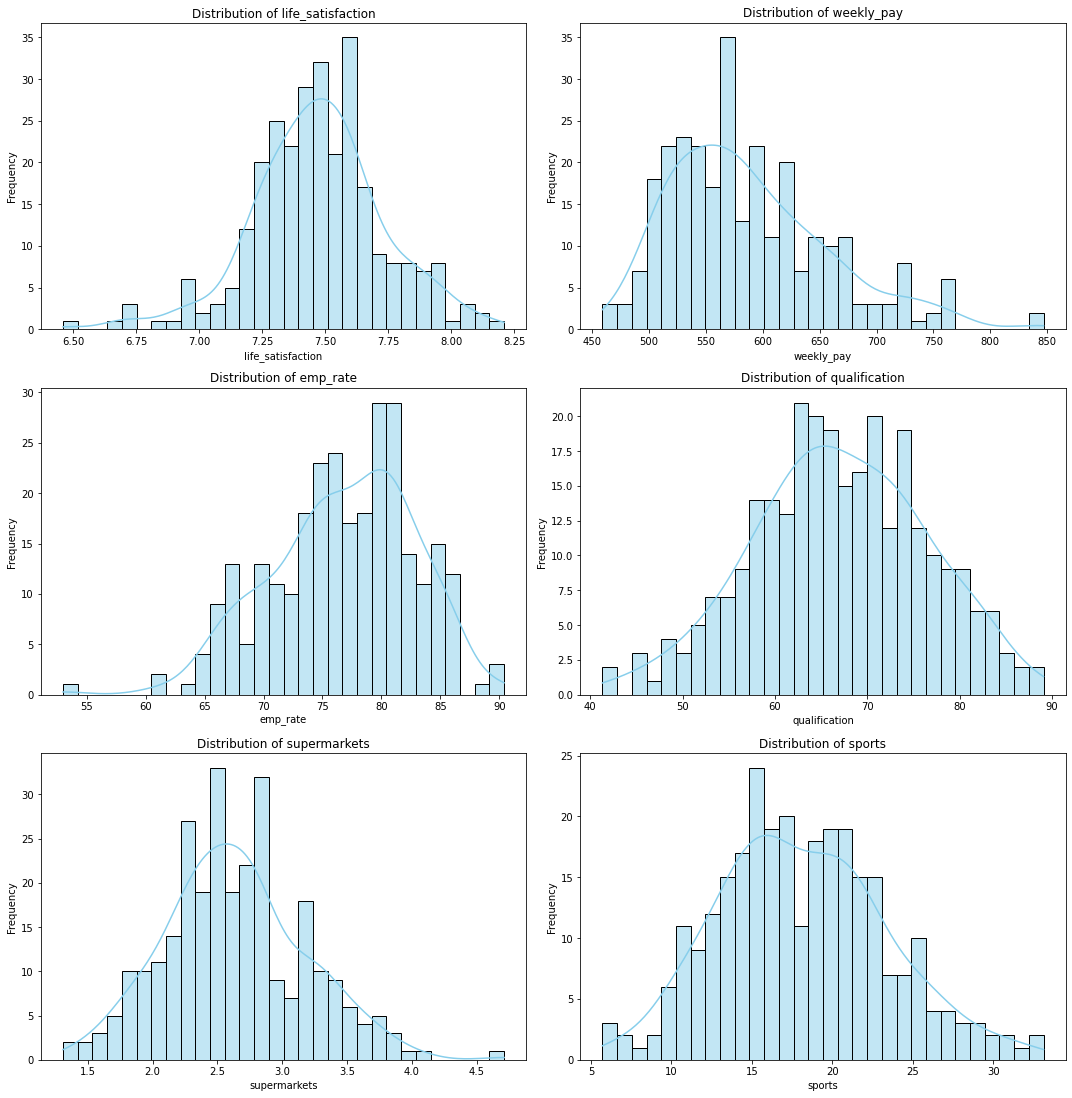

In [12]:
# Plotting the distribution of variables

numeric_columns = ['life_satisfaction', 'weekly_pay', 'emp_rate','qualification', 'supermarkets', 'sports'] 

# Set up the subplots
num_vars = len(numeric_columns)
rows = (num_vars + 2) // 2  # Calculate rows for 3 columns per row
cols = 2  # Fixed number of columns
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust figure size as needed

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each variable
for i, col in enumerate(numeric_columns):
    sns.histplot(table_final[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.savefig('distributions.png')
plt.show()


As shown in the graph above, while distribution of undelying variables is not perfectly symmetric, they still approximate a normal distribution without significant skew. 

## Correlation
Before building a linear regression model, it's crucial to remember the key assumptions of simple linear regression model. One critical assumption is that the model should be "linear in parameters." This means the relationship between the dependent variable (life satisfaction in this case) and a combination of the independent variables must be linear (https://www.albert.io/blog/key-assumptions-of-ols-econometrics-review/, https://365datascience.com/tutorials/statistics-tutorials/ols-assumptions/). 

Correlation analysis is a valuable tool to assess the strength and direction of the relationship between life satisfaction and each independent variable. By examining the correlation coefficients, we can gain insights into whether the relationships are linear or non-linear.

First of all, let's buld scatterplots in order to visualise the relationship between different variables.

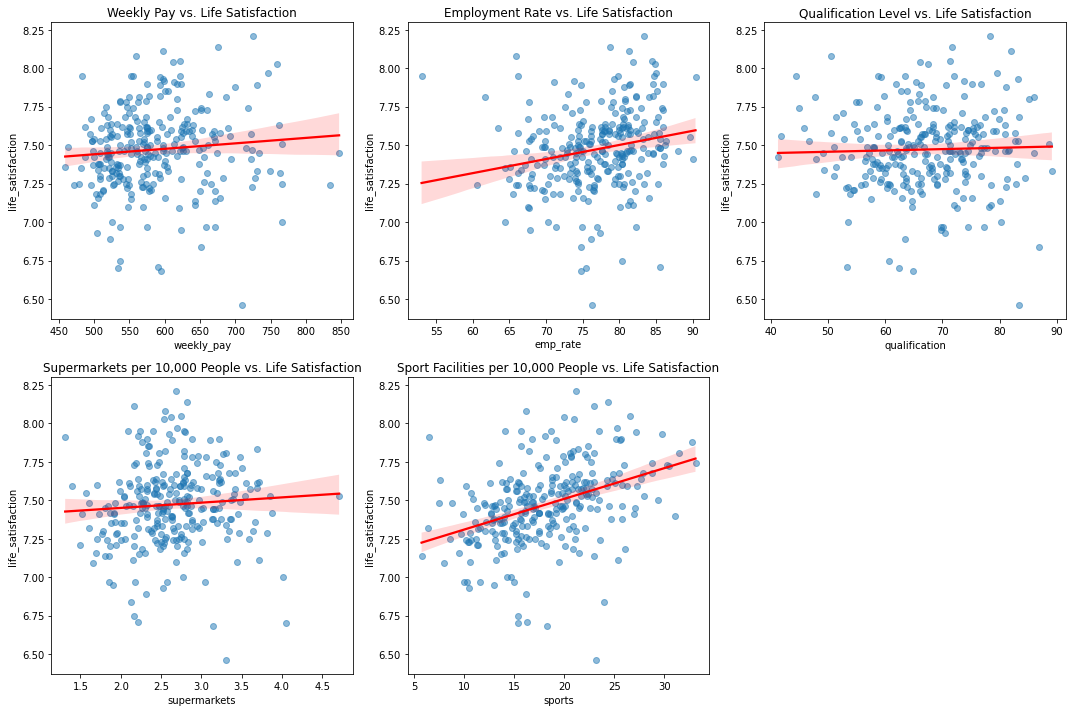

In [13]:
# Scatterplots

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Plot 1: Weekly Pay vs. Life Satisfaction
sns.regplot(data=table_final, x='weekly_pay', y='life_satisfaction', ax=axes[0, 0], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
axes[0, 0].set_title('Weekly Pay vs. Life Satisfaction')

# Plot 2: Employment Rate vs. Life Satisfaction
sns.regplot(data=table_final, x='emp_rate', y='life_satisfaction', ax=axes[0, 1], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
axes[0, 1].set_title('Employment Rate vs. Life Satisfaction')

# Plot 3: Qualification vs. Life Satisfaction
sns.regplot(data=table_final, x='qualification', y='life_satisfaction', ax=axes[0, 2], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
axes[0, 2].set_title('Qualification Level vs. Life Satisfaction')

# Plot 4: Supermarkets vs. Life Satisfaction
sns.regplot(data=table_final, x='supermarkets', y='life_satisfaction', ax=axes[1, 0], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
axes[1, 0].set_title('Supermarkets per 10,000 People vs. Life Satisfaction')

# Plot 5: Sport Facilities vs. Life Satisfaction
sns.regplot(data=table_final, x='sports', y='life_satisfaction', ax=axes[1, 1], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
axes[1, 1].set_title('Sport Facilities per 10,000 People vs. Life Satisfaction')


fig.delaxes(axes[1,2]) 
    
# Adjust layout and display
plt.tight_layout()
plt.savefig('correlation.png')
plt.show()

Based on the scatter plots, it is difficult to discern a strong linear correlation between most of the variables and life satisfaction. Except fot the plot illustrating the positive correlation between sport facilities and life satisfaction, other plots do not show any positive or negative petterns that could identify the presence of correlation.

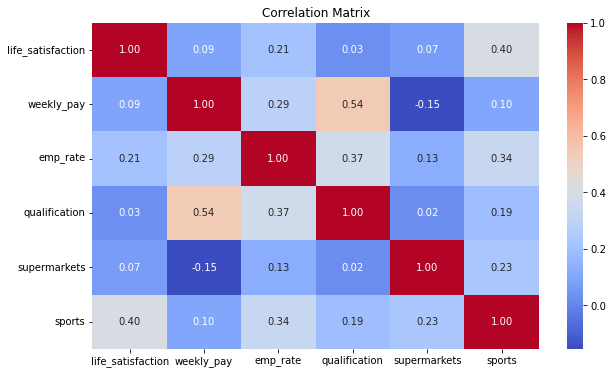

In [14]:
correlation_matrix = table_final[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig('corrmatrix.png')
plt.show()

Since visual analysis could not provide any invaluable insight on the correlation, it has been decided to have a more detailed look and build the correlation matrix, that provide the numerical information about the correlation. 

Interestingly, the correlation map above proves the result of previous visual analysis and shows that there is no correlation between the variable of interest and independent variables, they are close to 0. The highest correlation is identified between sport facilities and life satisfaction, which is 0.4, that is still very low.

What is also important to mention is that their is a quite string correlation between qulification level and gross median weekly pay - 0.54. The presence of correlation between these two variables can lead to multicollinearity problem in case including both of these variables in the model.

Overall, since there are no significan correlation between undelined varibles. So, it can be predicted that identified independent variables highly likely will not have the significant influence on life satisfaction and our model will have low predictive ability. 

# Modelling

While explarotary data anlysis identified that there is no linear relationship between life satisfaction and chosen independent variables, in order to ensure this let us build the model.

Our primary aim was to identify which factors influence the life satisfaction. On of the most popular econometrics model that can help to identify the affect of variable is ordinary least squared regression. In order to estimte the significance of parametaers the model esymates the parametrs by minimysing the sum of the squared errors (a difference between observed values and predicted values) (https://www.albert.io/blog/key-assumptions-of-ols-econometrics-review/). 
One of the reason of popularity of this model is that it is easy interptretable model that can be easily applyed.
However, this model can have disadvantages as well. For example, it is very reliable on outliers, presence of multicollinear variables, assumes linearity and is not capable of handling missing data (https://crunchingthedata.com/when-to-use-linear-regression/). 

Baring in mind all our previos result, advantages and disadvantages of the models. Let us proceed to model estimation.

In [15]:
# Import the necessary library
import statsmodels.api as sm

In [16]:
y = table_final['life_satisfaction']
X = table_final[['weekly_pay', 'emp_rate', 'supermarkets', 'sports']] 
# The model will not include the qulification parameter since
#previous step identified the significant correlation between variables. 
# It has been decided to include gross median weekly pay since it has slightly higher correlation with life satisfaction.

In [17]:
model = sm.OLS(y, sm.add_constant(X))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      life_satisfaction   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     13.77
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           2.96e-10
Time:                        16:03:33   Log-Likelihood:                 2.4453
No. Observations:                 283   AIC:                             5.109
Df Residuals:                     278   BIC:                             23.34
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8246      0.208     32.746      0.000       6.414       7.235
weekly_pay       0.0001      0.000      0.549      0.584      -0.000       0.001
emp_rate         0.0034      0.003      1.287      0.199      -0.002       0.009
supermarkets    -0.0090      0.028     -0.322      0.748      -0.064       0.046
sports           0.0186      0.003      6.252      0.000       0.013       0.025
==============================================================================
Omnibus:                       30.261   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.227
Skew:                          -0.466   Prob(JB):                     3.79e-18
Kurtosis:                       5.436   Cond. No.                     8.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
with open('model_summary.txt', 'w') as f:
  # Write the summary to the file
  f.write(str(result.summary()))

print("Model summary written to 'model_summary.txt' file.")

Model summary written to 'model_summary.txt' file.


Let's descuss the model results. 
As it was predicted, since there is no significant correlation between variables the predictive ability of the model is low. 
Thus, taking into account the r-squred estimation (0.165) that indicates that only 16.5% of the variation in life satisfaction can be explained by the independent variables included in the model. This suggests that the model has limited explanatory power. At the same time, F-statistic (13.77) and p-value (2.96e-10) indicate that the model is statistically significant, meaning that at least one of the independent variables is significantly related to1 life satisfaction. 
If we consider the coefficients, it could be identified that p-value for weekly pay, employment rate and superarkets is highly highly grater than critical value of 5% (and every acceptable critical value) that is why they are insignificant. Only sport facilities is significant, since p-value is aproximate 0.
Futher, we consistently eliminate the insignificant variables in order to check whether the predictive ability of the model will chenge.  As it can be seen from below, the elimintion of insignificant variables does not improve the model since adjusted R-squared is not significantly changing.


# Subsequent elimination of insignifican variables

In [18]:
y = table_final['life_satisfaction']
X2 = table_final[[ 'weekly_pay', 'emp_rate', 'sports']]
model2 = sm.OLS(y, sm.add_constant(X2))
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      life_satisfaction   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     18.38
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           6.55e-11
Time:                        16:03:33   Log-Likelihood:                 2.3926
No. Observations:                 283   AIC:                             3.215
Df Residuals:                     279   BIC:                             17.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8033      0.197     34.478      0.000       6.415       7.192
weekly_pay     0.0001      0.000      0.629      0.530      -0.000       0.001
emp_rate       0.0033      0.003      1.260      0.209      -0.002       0.008
sports         0.0184      0.003      6.325      0.000       0.013       0.024
==============================================================================
Omnibus:                       30.925   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.685
Skew:                          -0.471   Prob(JB):                     6.73e-19
Kurtosis:                       5.492   Cond. No.                     8.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
y = table_final['life_satisfaction']
X3 = table_final[[ 'emp_rate', 'sports']]
model3 = sm.OLS(y, sm.add_constant(X3))
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      life_satisfaction   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     27.43
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.32e-11
Time:                        16:03:33   Log-Likelihood:                 2.1920
No. Observations:                 283   AIC:                             1.616
Df Residuals:                     280   BIC:                             12.55
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8480      0.184     37.231      0.000       6.486       7.210
emp_rate       0.0038      0.003      1.489      0.138      -0.001       0.009
sports         0.0185      0.003      6.334      0.000       0.013       0.024
==============================================================================
Omnibus:                       29.320   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.076
Skew:                          -0.442   Prob(JB):                     6.74e-18
Kurtosis:                       5.434   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
y = table_final['life_satisfaction']
X4 = table_final['sports']
model4 = sm.OLS(y, sm.add_constant(X4))
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      life_satisfaction   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     52.41
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           4.32e-12
Time:                        16:03:33   Log-Likelihood:                 1.0754
No. Observations:                 283   AIC:                             1.849
Df Residuals:                     281   BIC:                             9.140
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1108      0.052    137.023      0.000       7.009       7.213
sports         0.0199      0.003      7.240      0.000       0.014       0.025
==============================================================================
Omnibus:                       28.647   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.641
Skew:                          -0.442   Prob(JB):                     6.19e-17
Kurtosis:                       5.355   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""